In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("Loan_default.csv")

In [7]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [9]:
data.describe(include="object").transpose()

,count,unique,top,freq
LoanID,255347,255347,I38PQUQS96,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


<Axes: >

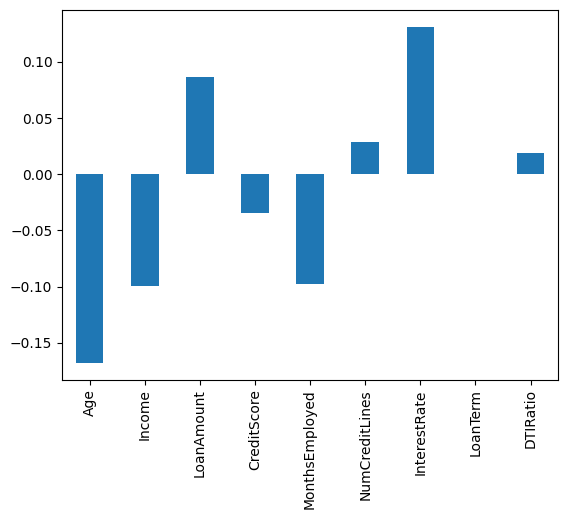

In [10]:
data.corr(numeric_only=True)["Default"].drop("Default").plot(kind="bar")

In [11]:
data.drop("LoanID", axis=1, inplace=True)

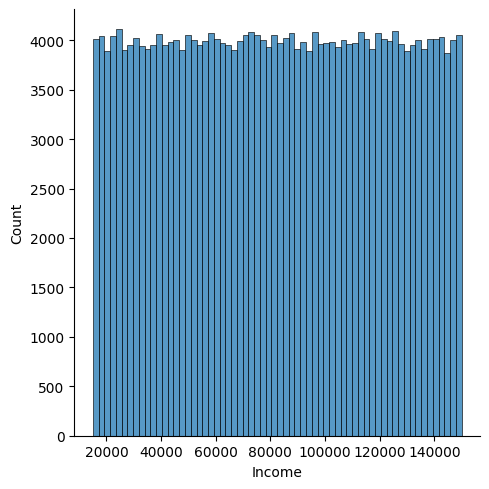

In [12]:
sns.displot(data=data, x="Income")

In [13]:
X = pd.get_dummies(data.drop("Default", axis=1), drop_first=True, dtype="int")
y = data["Default"]

In [14]:
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,0,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0


In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [16]:
Random_under_sample = RandomUnderSampler(sampling_strategy=0.4, random_state=101)

In [17]:
X,y = Random_under_sample.fit_resample(X,y)

In [18]:
over_sample = SMOTE(sampling_strategy="auto", random_state=101)

In [19]:
X,y = over_sample.fit_resample(X,y)

# Now using Randaom Forest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Split the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

### Standardize the features

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create a Random forest Model

In [23]:
rfc_model = RandomForestClassifier()

In [24]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred = rfc_model.predict(X_test)

### import Metrics

In [26]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     22138
           1       0.85      0.73      0.79     22342

    accuracy                           0.80     44480
   macro avg       0.81      0.80      0.80     44480
weighted avg       0.81      0.80      0.80     44480



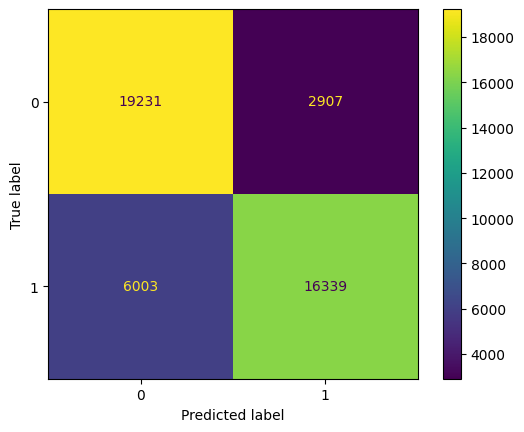

In [28]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

# Create model

In [29]:
def general_model(model_instance):
    model = model_instance()
    model.fit(X_train,y_train)
    y_prediction = model.predict(X_test)
    print(classification_report(y_test,y_prediction))
    cm = confusion_matrix(y_test,y_prediction)
    dist = ConfusionMatrixDisplay(cm)
    dist.plot()

In [30]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.75      0.88      0.81     22138
           1       0.86      0.71      0.78     22342

    accuracy                           0.80     44480
   macro avg       0.80      0.80      0.79     44480
weighted avg       0.81      0.80      0.79     44480



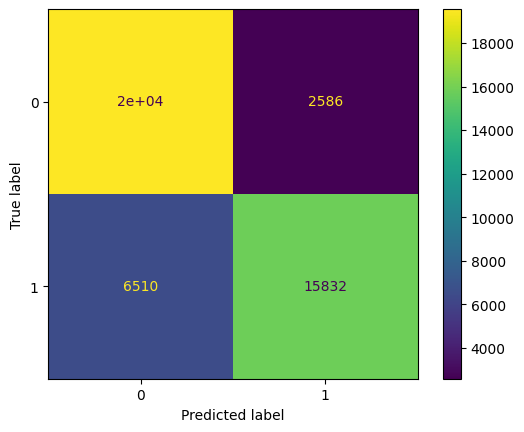

In [31]:
general_model(SVC)

# Using Tensorflow

In [ ]:
from tenor

In [33]:
X = X.values
y = y.values

In [32]:
y.shape

(148264,)